## Homework 4
http://wiki.quantsoftware.org/index.php?title=CompInvesti_Homework_4

In [1]:
from lib import DataAccess as da
from lib import qsdateutil as du
from lib import EventProfiler as ep
from lib import homework_2 as h2
from lib import homework_3 as h3
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def evento2orders(matrix_event,orders,buy_days=0,sell_days=5,shares=100):
    
    #organize buy and sell days for all dates
    matrix_event['buy_day'] = matrix_event.index
    matrix_event['sell_day'] = matrix_event.index
    matrix_event['buy_day'] = matrix_event['buy_day'].shift(-buy_days)
    matrix_event['sell_day'] = matrix_event['sell_day'].shift(-sell_days)
    
    # Create Buy and Sell orders
    out = list()
    for column in matrix_event:
        if column=='buy_day' or column=='sell_day':
            continue
        symbol = matrix_event[column]
        for date, event in symbol.dropna().iteritems():
            buy_day = matrix_event['buy_day'][date]
            sell_day = matrix_event['sell_day'][date]
            if buy_day==buy_day:
                #[year, month, day, symbol, op, n_shares]
                out.append([buy_day.year,buy_day.month,buy_day.day,column,'Buy',shares])
            if sell_day==sell_day:           
                out.append([sell_day.year,sell_day.month,sell_day.day,column,'Sell',shares])
    
    # To Dataframe
    col = ['year','month','day','symbol','op','n_shares']
    df_od = pd.DataFrame(out,columns = col)
    df_od = df_od.sort_values(by=['year', 'month', 'day'])
    df_od = df_od.reset_index(drop=True)
    df_od.to_csv('data/orders/'+orders+'.csv',index = False)
    
    del matrix_event['buy_day']
    del matrix_event['sell_day']
    return df_od

__Get data:__

In [3]:
dataobj = da.DataAccess('Yahoo')
#date
startdate = dt.datetime(2008, 1, 1) 
enddate = dt.datetime(2009, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
timestamps = du.getNYSEdays(startdate, enddate, dt_timeofday)

#data
symbols =  dataobj.get_symbols_from_list("sp5002012")
symbols.append('SPY')
keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = dataobj.get_data(timestamps, symbols, keys)
data = dict(zip(keys, ldf_data))

#remove NAN from price data
for s_key in keys:
    data[s_key] = data[s_key].fillna(method = 'ffill')
    data[s_key] = data[s_key].fillna(method = 'bfill')
    data[s_key] = data[s_key].fillna(1.0)

__Example:__

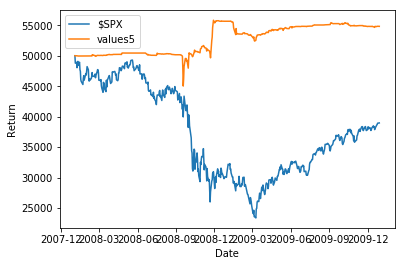

,symbol,daily_ret_avg,daily_ret_std,sharpe,cum_ret
0,$SPX,-0.000255,0.022005,-0.184203,0.779306
1,values5,0.000202,0.006085,0.527865,1.096480


In [4]:
matrix_event = h2.event5(data['actual_close'])
evento2orders(matrix_event,'orders5')
h3.marketsim(50000,'orders5','values5')
h3.analyze("values5","$SPX")

### My Events:

Change:
 - \$5 to \$6.44 
 - 0 to 2 days to buy
 - 5 to 9 days to sell

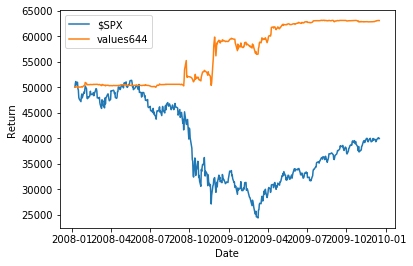

,symbol,daily_ret_avg,daily_ret_std,sharpe,cum_ret
0,$SPX,-0.000214,0.022169,-0.153183,0.797862
1,values644,0.000499,0.007390,1.071976,1.260680


In [5]:
matrix_event = h2.event5(data['actual_close'],cut_off = 6.44)
evento2orders(matrix_event,'orders644',buy_days=2,sell_days=9)
h3.marketsim(50000,'orders644','values644')
h3.analyze("values644","$SPX")